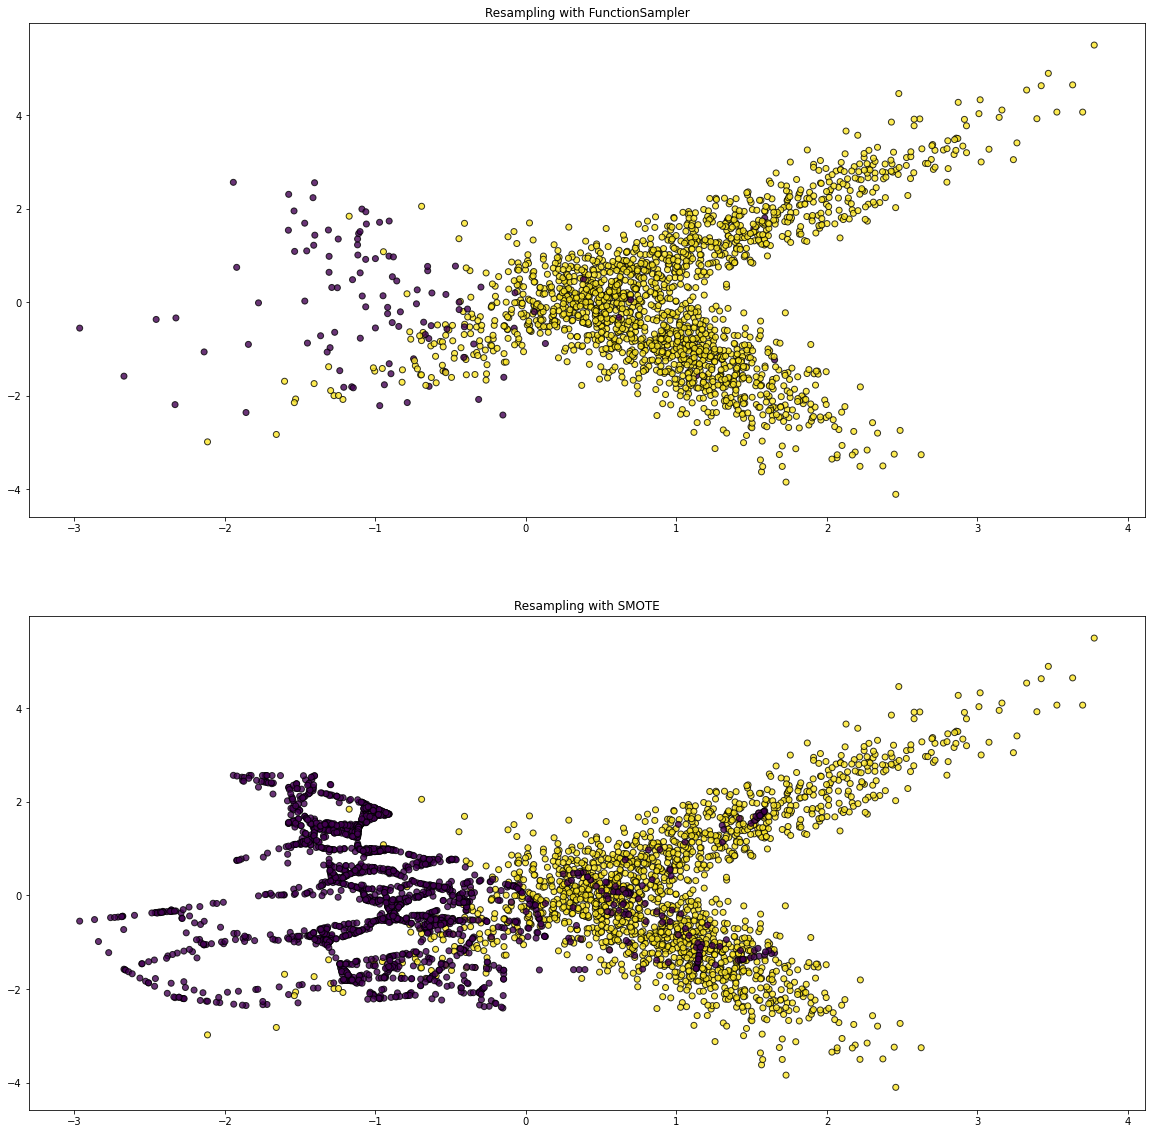

In [12]:
from imblearn import FunctionSampler
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

def plot_resampling(X, y, sampler, ax):
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
    title = f"Resampling with {sampler.__class__.__name__}"
    ax.set_title(title)

X, y = make_classification(
    n_samples=2000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    weights=[0.05, 0.95],
    class_sep=1.0,
    random_state=1
)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

samplers = [
    FunctionSampler(),
    SMOTE()
]

for ax, sampler in zip(axs.ravel(), samplers):
    plot_resampling(X, y, sampler, ax)

In [14]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
import tensorflow as tf
import pandas as pd

dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# ファイルのダウンロード
dataset_path = tf.keras.utils.get_file('wine.data', dataset_url)

print(dataset_path)

column_names = ['Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash',
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline' 
]

raw_data = pd.read_csv(dataset_path, names=column_names)
raw_data['y'] = raw_data.index
raw_data = raw_data.reset_index(drop=True)

raw_data['y'] = raw_data['y'].apply(lambda x: 0 if x == 3 else 1)

X = raw_data.drop('y', axis=1)
y = raw_data['y']

C:\Users\baseb\.keras\datasets\wine.data


In [22]:
sampler = SMOTE()
r_X, r_y = sampler.fit_resample(X=X, y=y.values)

In [24]:
r_X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.230000,1.710000,2.430000,15.600000,127,2.800000,3.060000,0.280000,2.290000,5.640000,1.040000,3.920000,1065
1,13.200000,1.780000,2.140000,11.200000,100,2.650000,2.760000,0.260000,1.280000,4.380000,1.050000,3.400000,1050
2,13.160000,2.360000,2.670000,18.600000,101,2.800000,3.240000,0.300000,2.810000,5.680000,1.030000,3.170000,1185
3,14.370000,1.950000,2.500000,16.800000,113,3.850000,3.490000,0.240000,2.180000,7.800000,0.860000,3.450000,1480
4,13.240000,2.590000,2.870000,21.000000,118,2.800000,2.690000,0.390000,1.820000,4.320000,1.040000,2.930000,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,12.523456,1.249611,2.221166,17.980571,88,1.900041,0.580000,0.586544,1.278834,5.863291,0.717321,1.517689,648
256,13.294281,2.054945,2.660260,21.993493,91,2.242068,0.897397,0.523377,1.769986,9.335650,0.637534,1.958966,613
257,13.109386,2.858027,2.316133,19.661333,94,1.395484,0.563218,0.351938,0.752889,6.189281,0.688711,2.363884,796
258,12.686542,1.675907,2.278334,18.371813,86,1.984743,0.619232,0.567307,1.250000,6.097321,0.706409,1.533975,650


In [25]:
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    0
174    0
175    0
176    0
177    0
Name: y, Length: 178, dtype: int64

In [28]:
r_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)